In [ ]:
#PAPATYALAR - Muhammed Ali Karslı , Efe Genç , Ökkeş Donbaloğlu

In [559]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [380]:
df = pd.read_excel("GSU_DataChallenge.xlsx") #reading the file

In [381]:
df.describe(include='all').T #analysing the nature of data

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Tarih,547284,NaN,NaN,NaN,2023-06-27 14:15:25.279014144,2023-01-01 00:00:00,2023-04-19 00:00:00,2023-07-05 00:00:00,2023-09-09 00:00:00,2023-11-30 00:00:00,NaN
ÜrünKodu,547284,810,30.209.0010,9405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FaturaNo,547284.0,NaN,NaN,NaN,120089427078.428787,0.0,221611457.0,331020427.0,1200270797.0,1200711112714640.0,8681073383761.832031
Birim,547284,3,ADET,455463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Miktar,547284.0,NaN,NaN,NaN,3.530686,-11.0,1.0,2.0,3.0,619.0,11.214497
KategoriAdı,547284,33,Alkolsüz İçecekler Grubu,91672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AltKategoriAdi,547284,119,Sıcak Kahveler,56059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MagazaKodu,547284,6,B1,139990,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
def amount_by(df, by):  #getting the amount (miktar), by selected column
    dikt = {}

    for (index, elem) in enumerate(df[by]):
        if elem != "Tarih":
            elem = elem.__str__().lower()
        if dikt.__contains__(elem):
            dikt[elem] += int(df["Miktar"][index])
        else:
            dikt[elem] = int(df["Miktar"][index])

    return dikt

In [384]:
urunmiktarlari = amount_by(df,'KategoriAdı') #getting the amounts based on categories

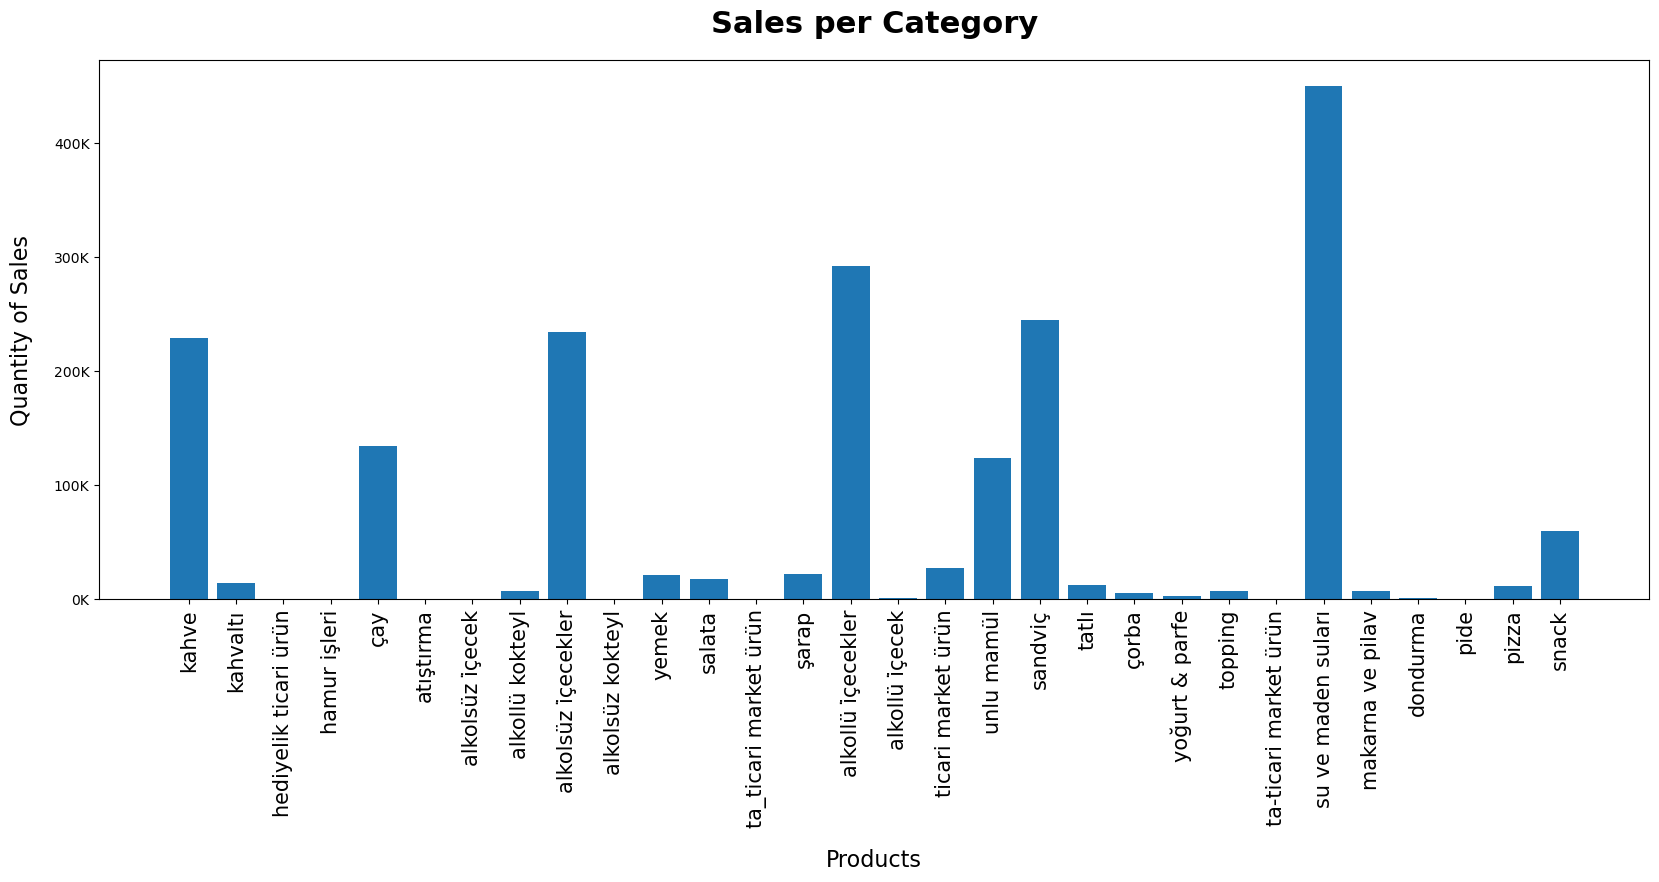

In [553]:
#satilan urunlerin miktari cinsinden grafigi
#making the plot of sales per each category

miktarlar = list(urunmiktarlari.values())
urunler = list(urunmiktarlari.keys())
def g(urun):
    if urun.lower() != "topping":
        return urun[:-6] #deleting the last 00.00 part from the date
    else:
        return urun

urunler = list(map(g, urunler))
fig1, ax1 = plt.subplots(figsize=(20,7))

ax1.bar(urunler,miktarlar, align="center")
plt.xlabel('Products', fontsize=16, labelpad=15)
plt.ylabel('Quantity of Sales', fontsize=16, labelpad=15)
plt.title('Sales per Category',fontsize=22, fontweight='bold' , pad=20)
plt.xticks(rotation=90, fontsize=15)
def millions(x, pos):
    #x ve pos parametreleri ile milyonlar olarak biçimlendirme işlevi
    return f'{x/1000:.0f}K'

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.savefig("satilan.jpg")
plt.show()

In [388]:
magazasatislari = amount_by(df,'MagazaKodu') #getting the sales per each shop

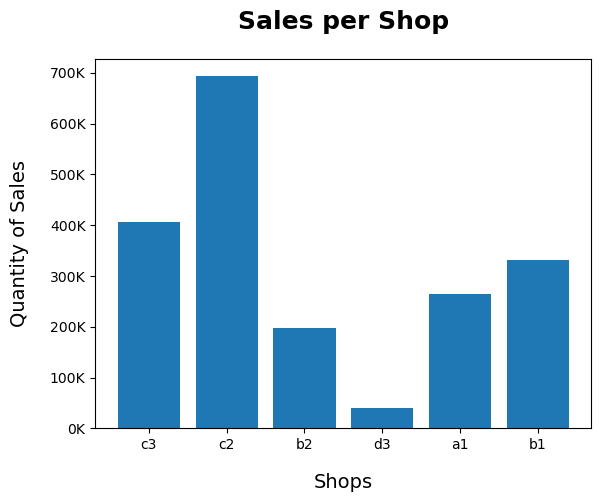

In [502]:
#magazalarin toplam kac urun sattigi cinsinden grafigi
#making sales/shop plot
miktarlar = list(magazasatislari.values())
urunler = list(magazasatislari.keys())

fig1, ax1 = plt.subplots()
ax1.bar(urunler,miktarlar)
plt.title('Sales per Shop',fontsize=18, fontweight='bold', pad=21.5 )
plt.xlabel('Shops', fontsize=14 , labelpad=15)
plt.ylabel('Quantity of Sales', fontsize=14 , labelpad=15)
"""def millions(x, pos):
    'x ve pos parametreleri ile milyonlar olarak biçimlendirme işlevi'
    return f'{x/1000:.0f}K'
"""
formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)

plt.show()

In [232]:
def f(df, by): #this function finds the quantity of sales for each shop for indicated column
    dikt = {}

    for (index, elem) in enumerate(df["MagazaKodu"]):
        if dikt.__contains__(elem):
            obj = df[by][index]
            if dikt[elem].__contains__(obj):
                dikt[elem][obj] += int(df["Miktar"][index])
            else:
                dikt[elem][obj] = int(df["Miktar"][index])
        else:
            dikt[elem] = {
                df[by][index]: df["Miktar"][index]
            }

    return dikt

In [391]:
magazalarozelsatis = f(df,"KategoriAdı") #getting the sales per each category for each shop

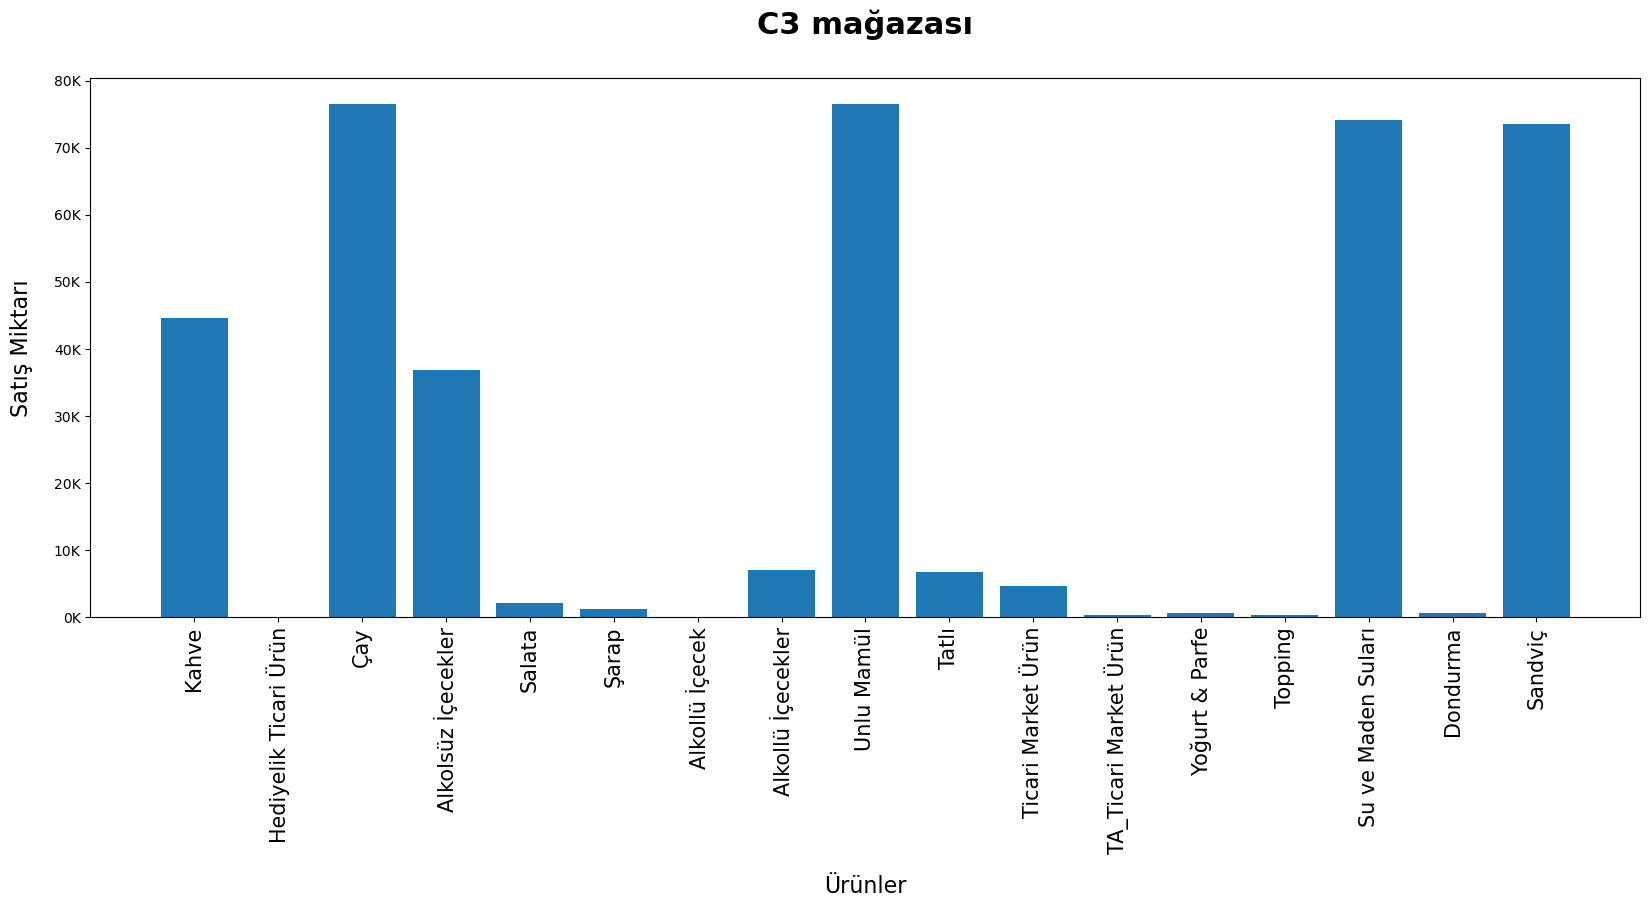

In [392]:
x = list(list(magazalarozelsatis.values())[0].keys()) #plotting 
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[0].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('C3 mağazası',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Ürünler', fontsize=16 , labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

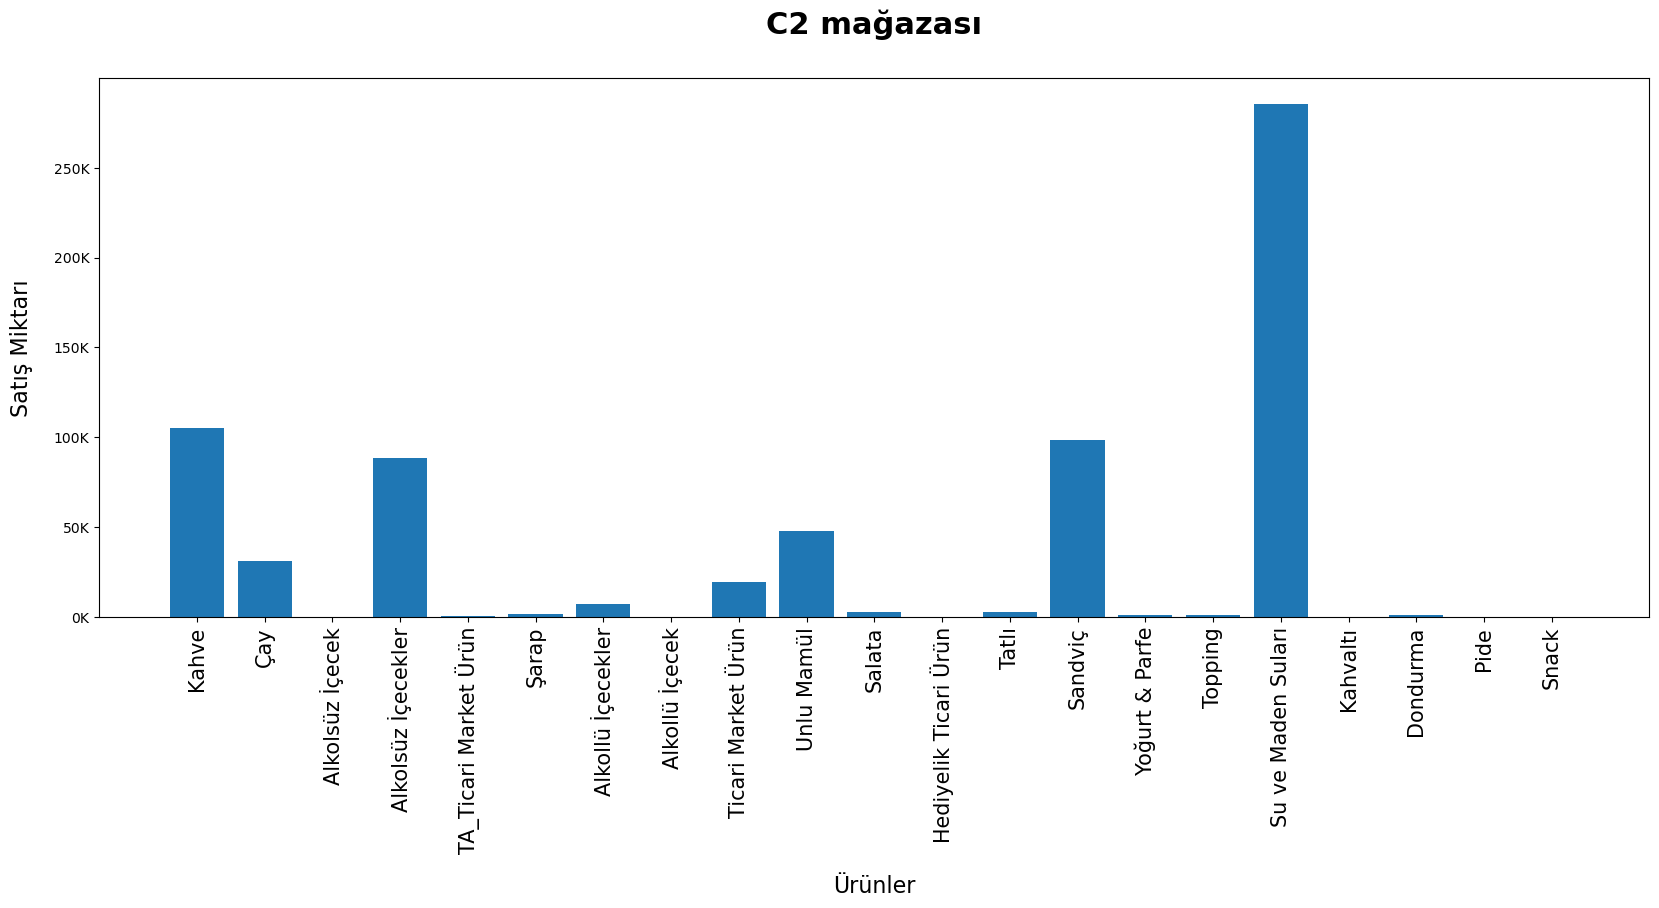

In [393]:
x = list(list(magazalarozelsatis.values())[1].keys())
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[1].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('C2 mağazası',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Ürünler', fontsize=16 , labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

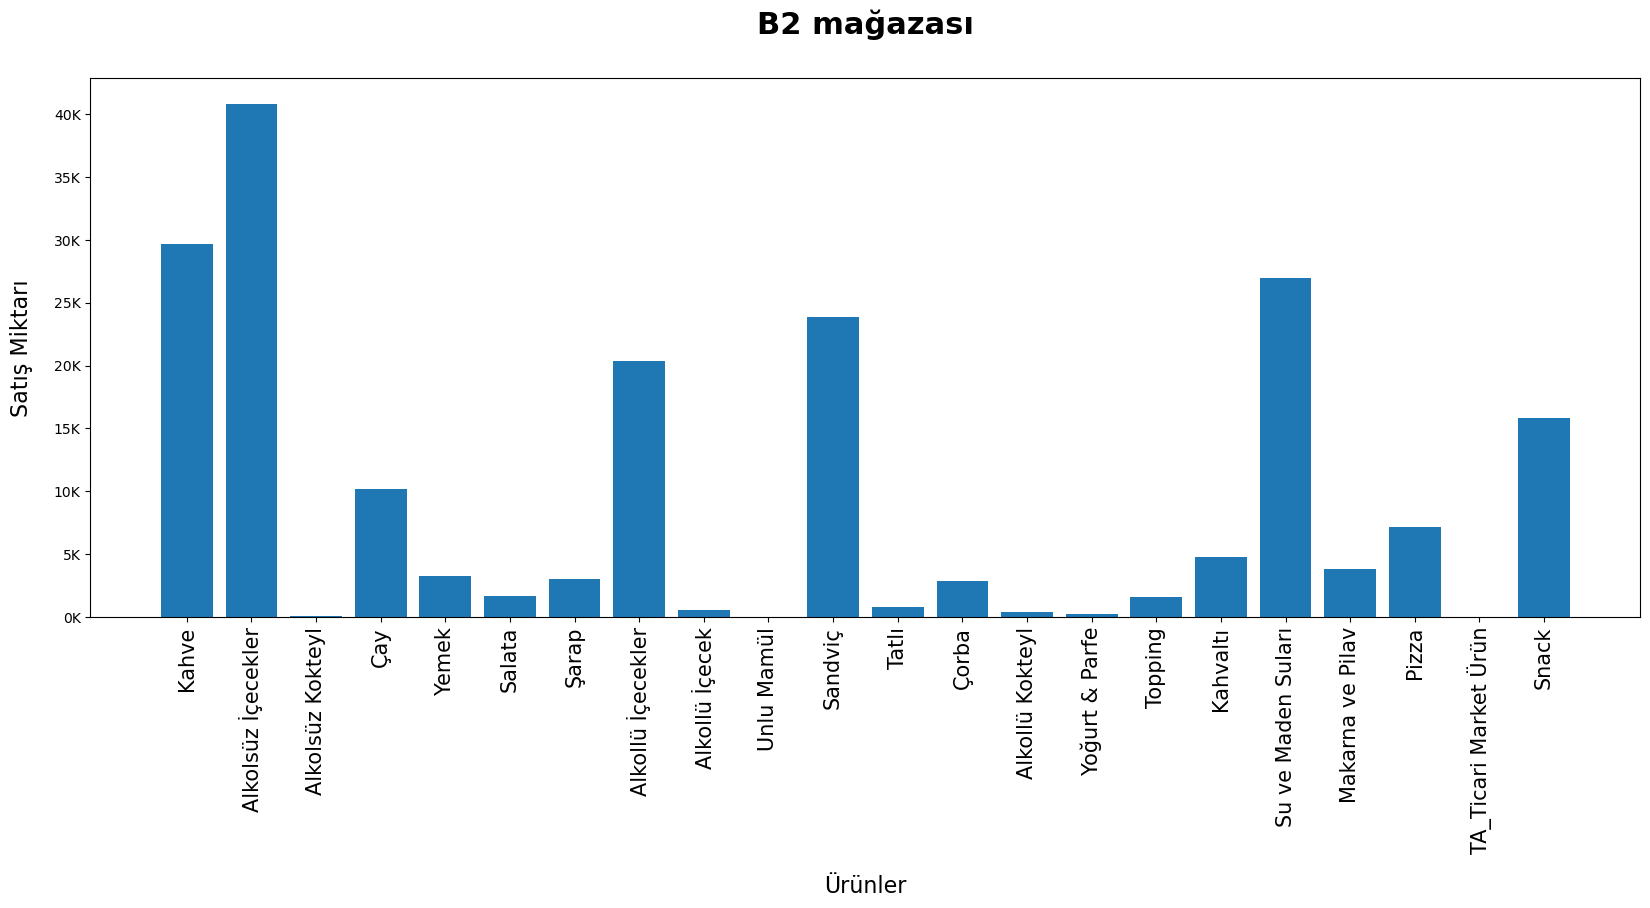

In [394]:
x = list(list(magazalarozelsatis.values())[2].keys())
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[2].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('B2 mağazası',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Ürünler', fontsize=16, labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

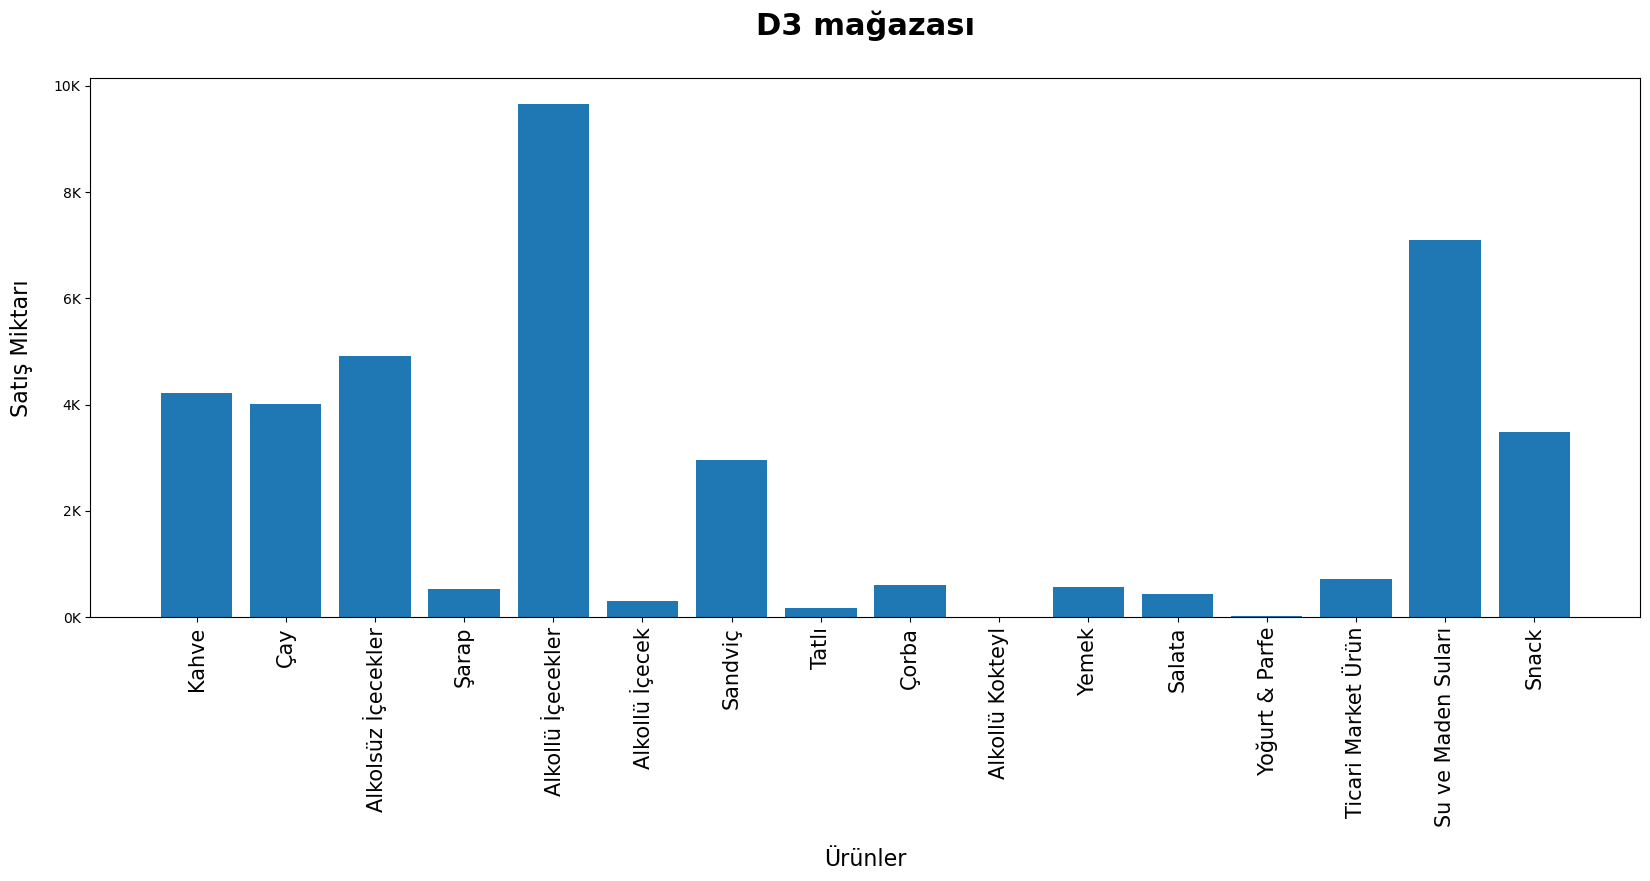

In [395]:
x = list(list(magazalarozelsatis.values())[3].keys())
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[3].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('D3 mağazası',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Ürünler', fontsize=16 , labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16, labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

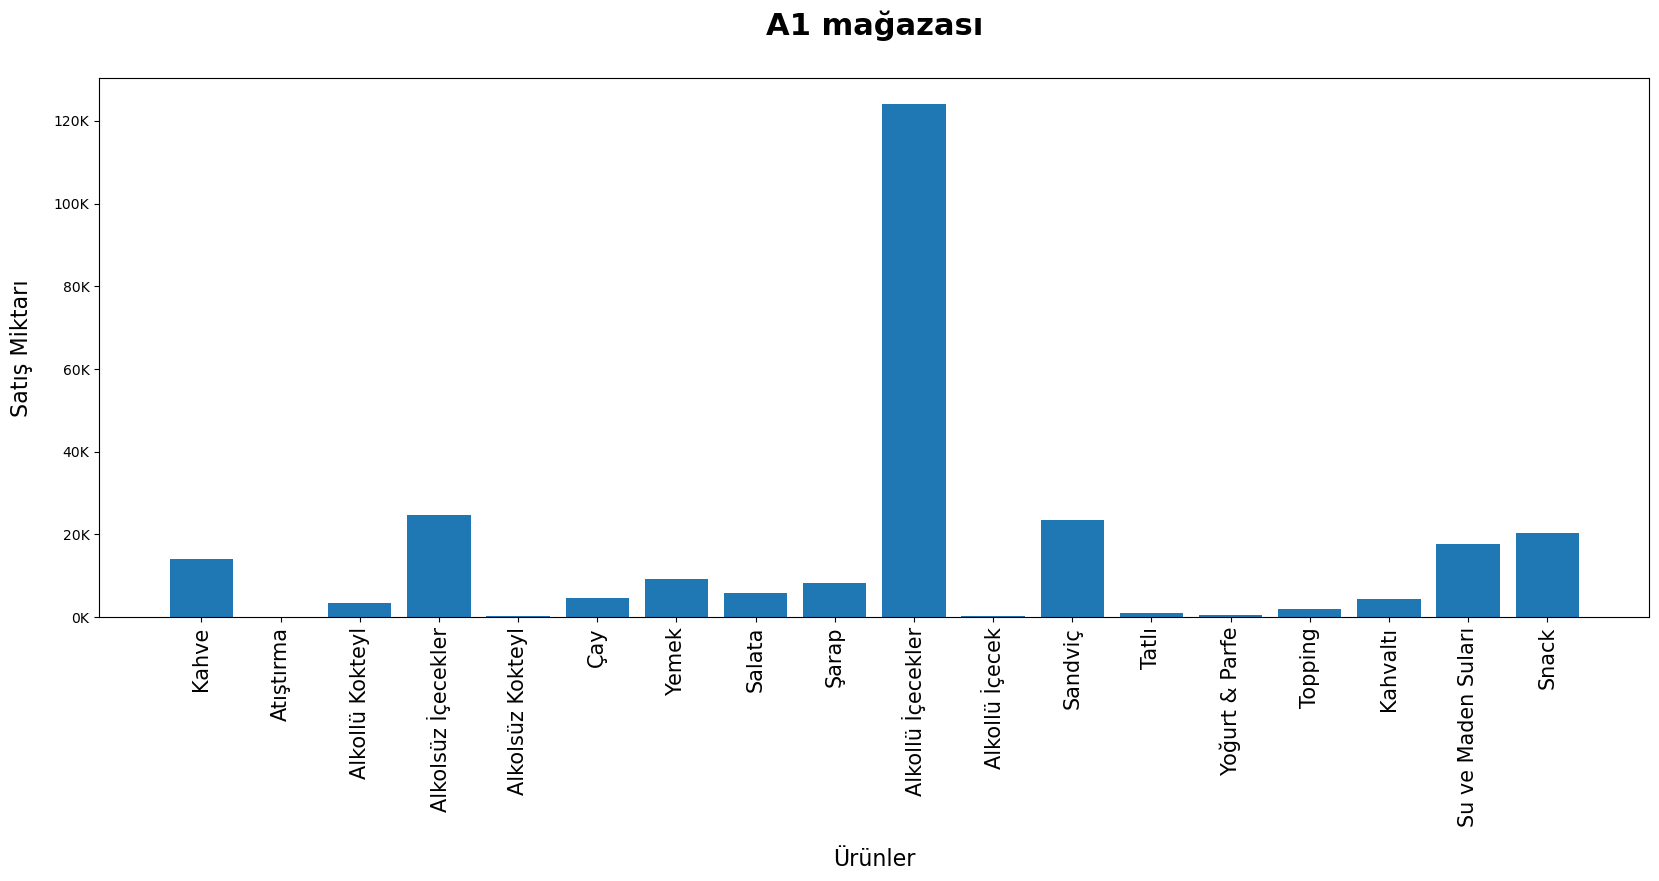

In [396]:
x = list(list(magazalarozelsatis.values())[4].keys())
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[4].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('A1 mağazası',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Ürünler', fontsize=16 , labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

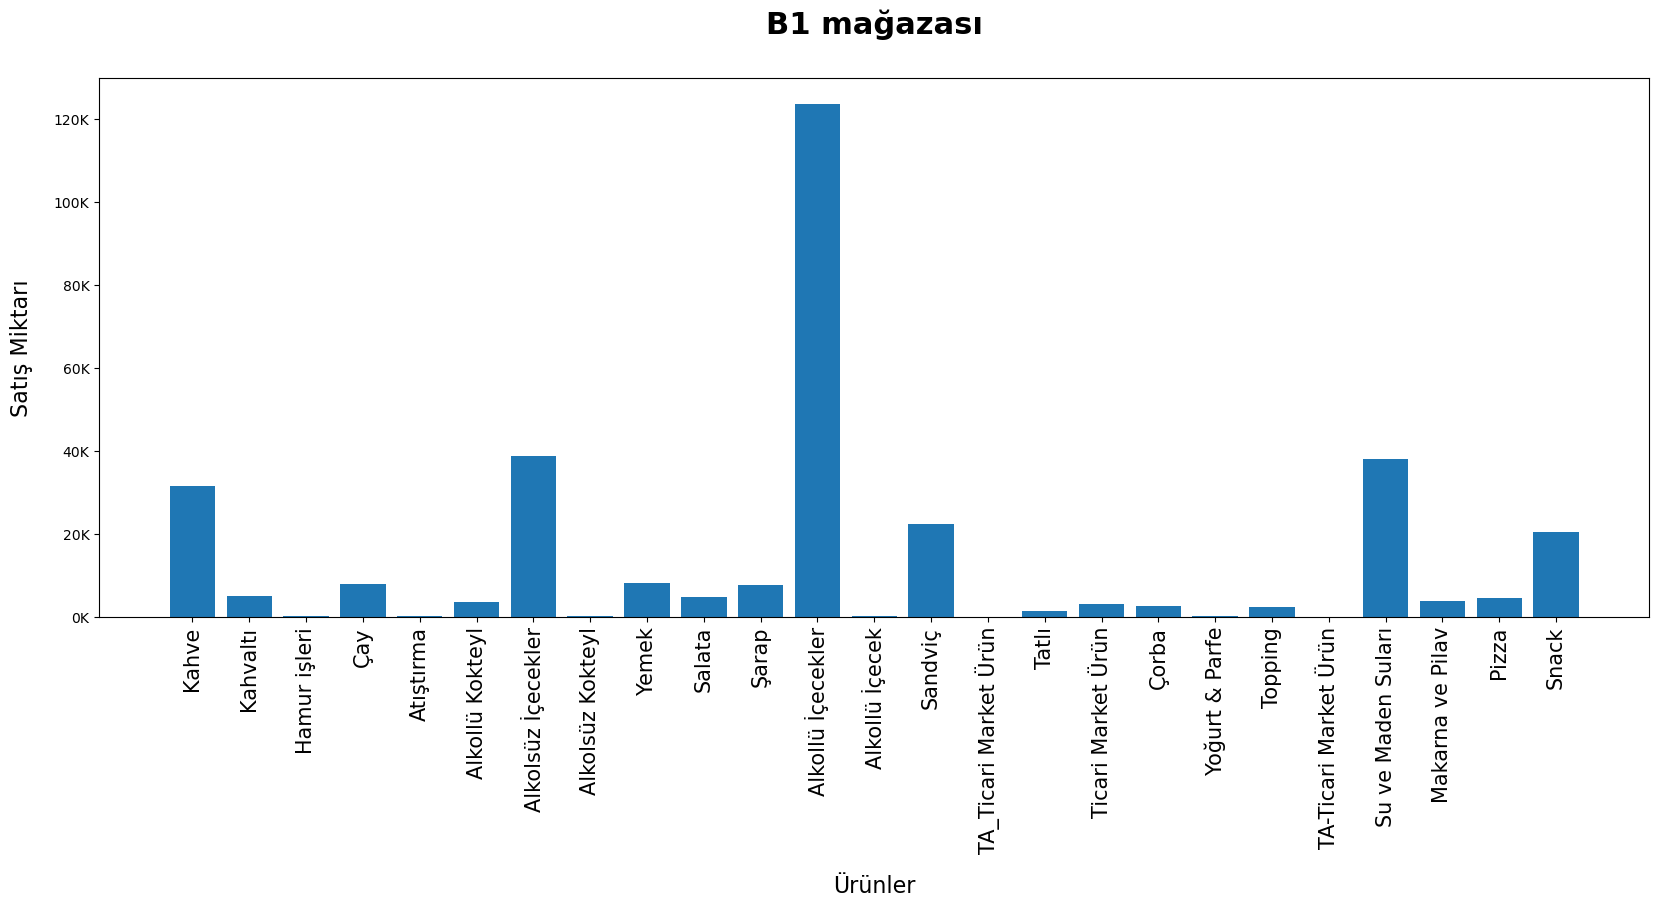

In [397]:
x = list(list(magazalarozelsatis.values())[5].keys())
x = list(map(g, x))
y = list(list(magazalarozelsatis.values())[5].values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('B1 mağazası',fontsize=22, fontweight='bold', pad=31.5)
plt.xlabel('Ürünler', fontsize=16 , labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [512]:
tarihbazli = amount_by(df,"Tarih") #getting the total sales by time

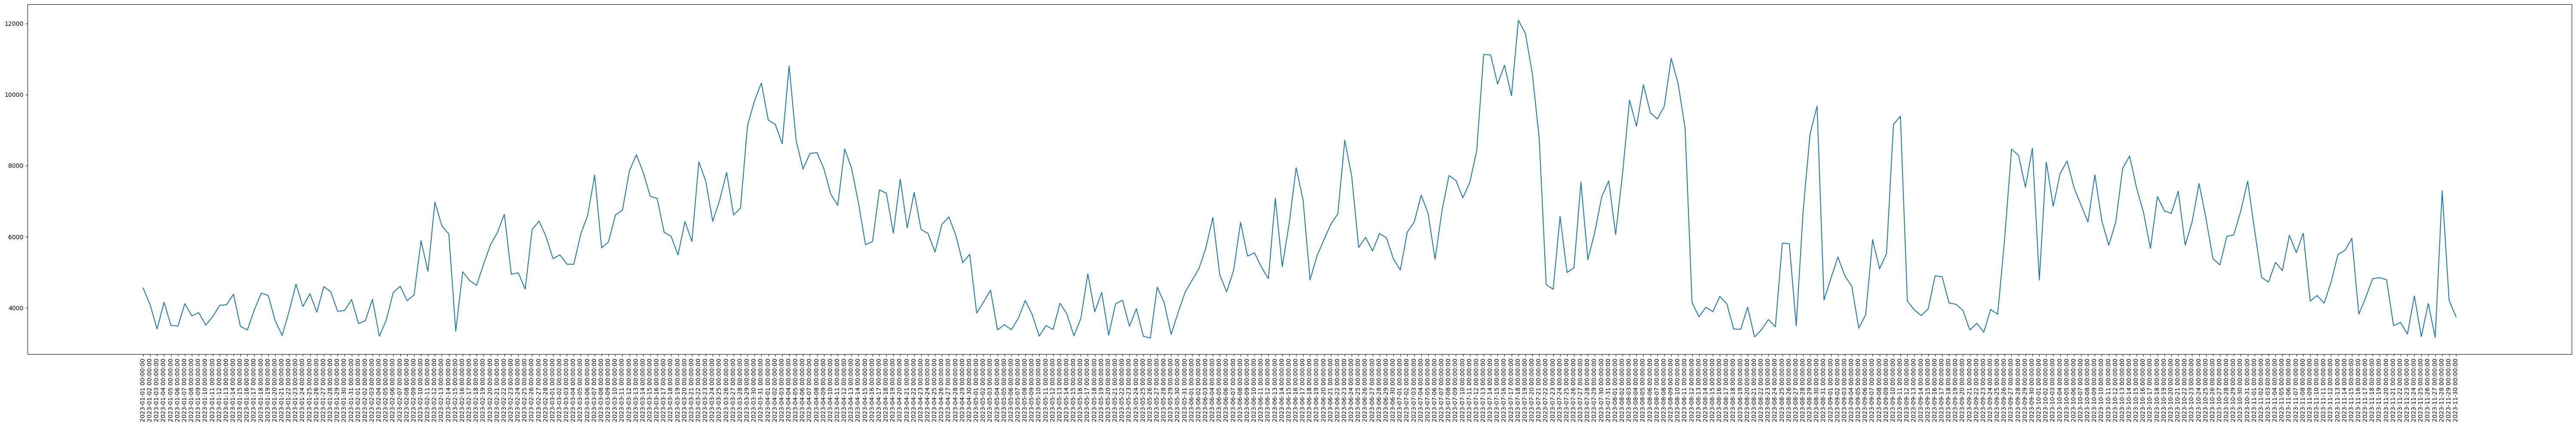

In [516]:
y = list(tarihbazli.values()) #plotting total sales by time
x = list(tarihbazli.keys())
x.sort()
plt.figure(figsize=(60,10))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.tight_layout()
plt.xticks(x)
plt.savefig('tarihgrafik.pdf')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


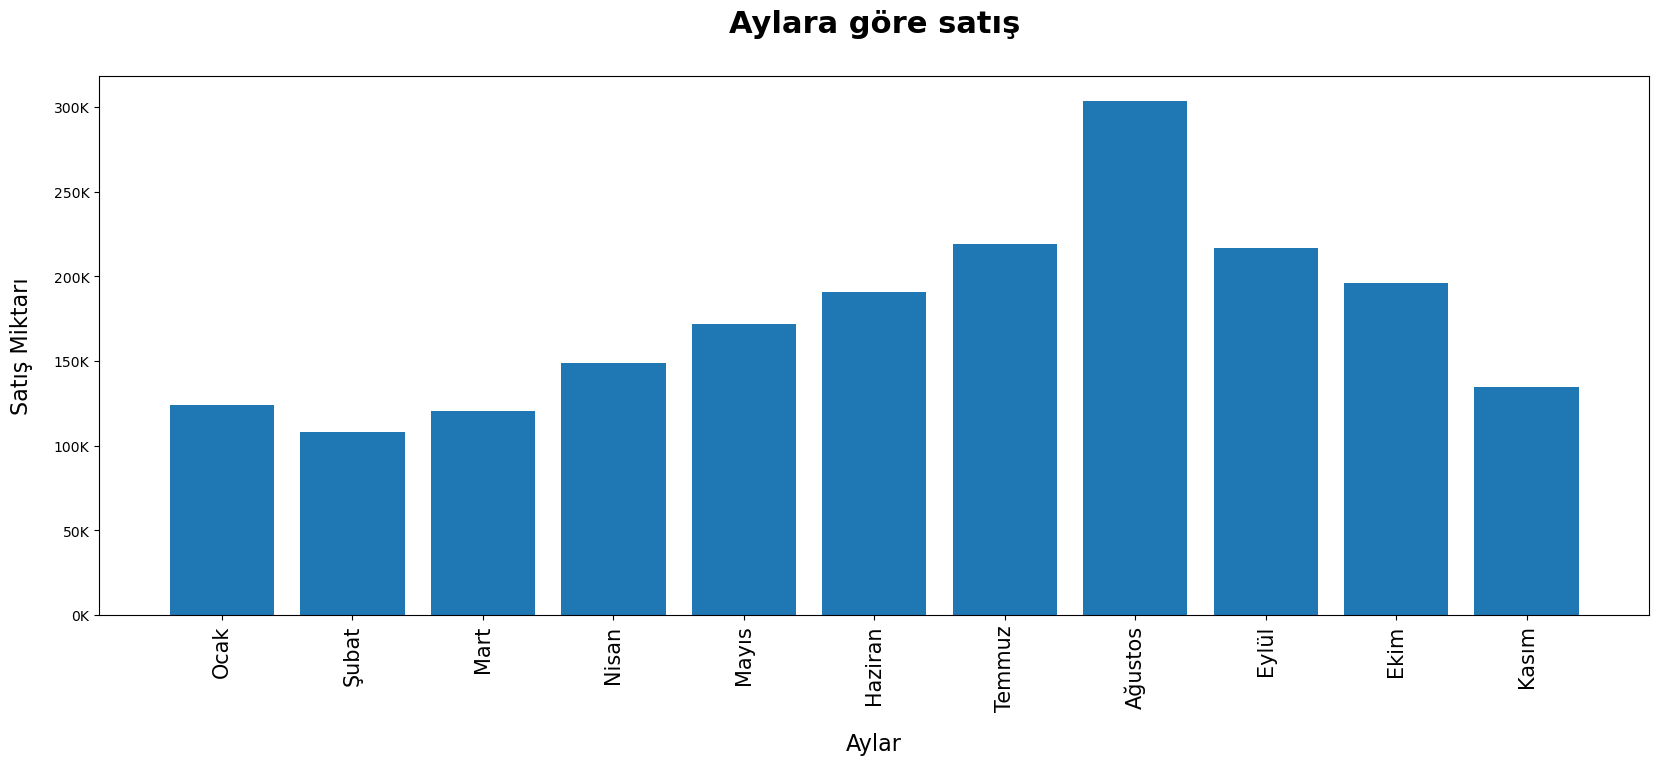

In [398]:
def amount_by_month(df):
    dikt = {}

    for (index, elem) in enumerate(df["Tarih"]):
        elem = elem.month
        if dikt.__contains__(elem):
            dikt[elem] += int(df["Miktar"][index])
        else:
            dikt[elem] = int(df["Miktar"][index])

    return dikt
monthly = amount_by_month(df)
print(list(monthly.keys()))
x = ["Ocak", "Şubat", "Mart", "Nisan", "Mayıs", "Haziran", "Temmuz", "Ağustos", "Eylül","Ekim", "Kasım"]
y = list(monthly.values())
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y)

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('Aylara göre satış',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Aylar', fontsize=16, labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[28561, 26211, 25440, 26706, 27441, 27003, 26849, 27670, 27244, 27647, 26945, 26504, 27436, 36553, 40389, 37243, 40179, 37402, 40884, 45069, 45495, 47365, 42842, 44289, 48333, 49372, 53407, 68355, 75341, 65639, 58333, 53639, 49952, 47228, 48518, 47074, 44701, 42997, 27188, 14205, 3381, 36980, 39268, 69989, 33305, 43113, 37588, 34445, 30522]


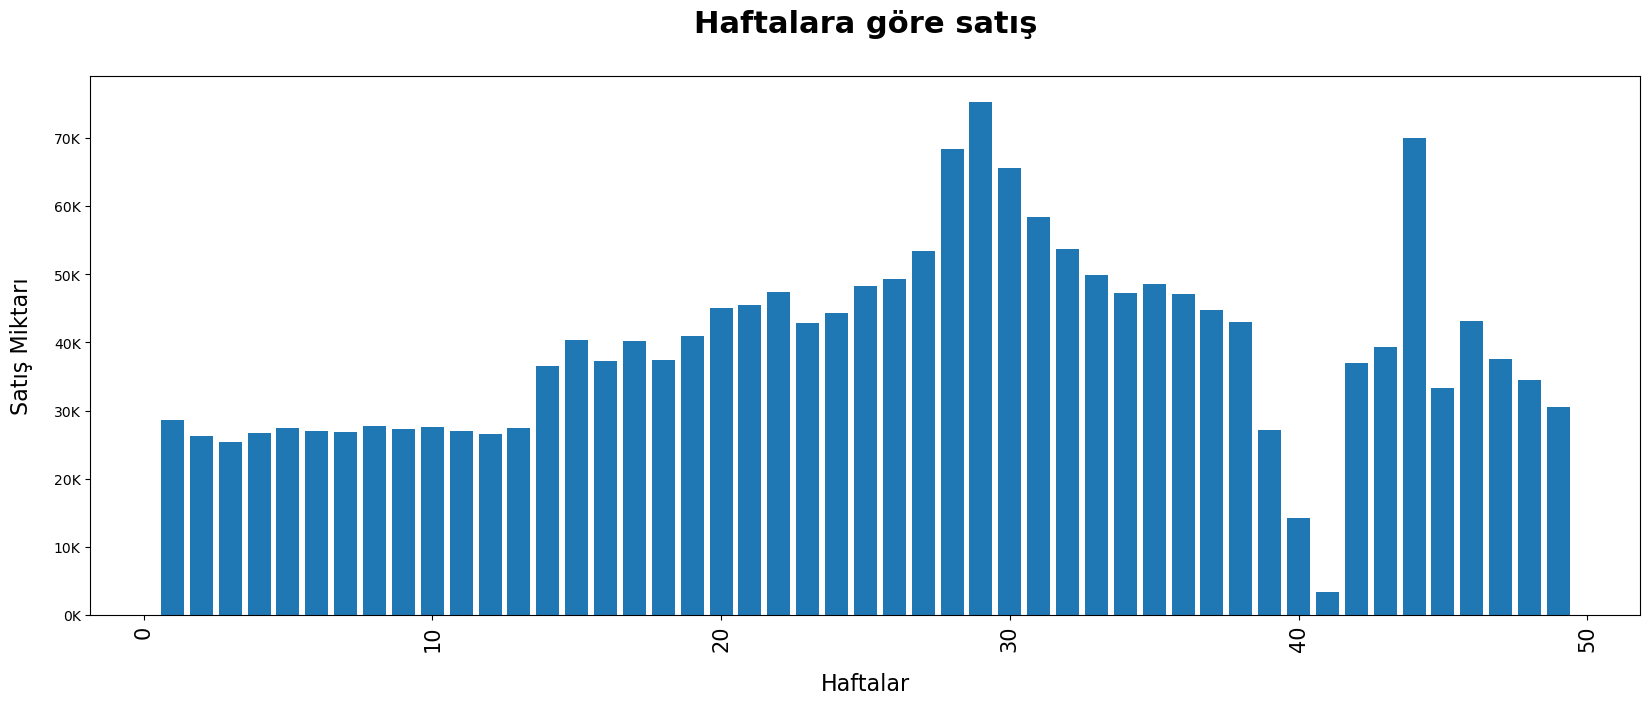

In [399]:
def amount_by_week(df):
    dikt = {}

    for (index, elem) in enumerate(df["Tarih"]):
        elem = elem.week
        if dikt.__contains__(elem):
            dikt[elem] += int(df["Miktar"][index])
        else:
            dikt[elem] = int(df["Miktar"][index])

    return dikt
weekly = amount_by_week(df)
x = list(weekly.keys())
x.sort()
x[48] = 49
print((x))
y = list(weekly.values())
print((y))
fig1, ax1 = plt.subplots(figsize=(20,7))
ax1.bar(x, y, align="center")

formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
plt.title('Haftalara göre satış',fontsize=22, fontweight='bold', pad=31.5 )
plt.xlabel('Haftalar', fontsize=16, labelpad=15)
plt.ylabel('Satış Miktarı', fontsize=16 , labelpad=15)
plt.xticks(rotation=90, fontsize=15)
plt.show()

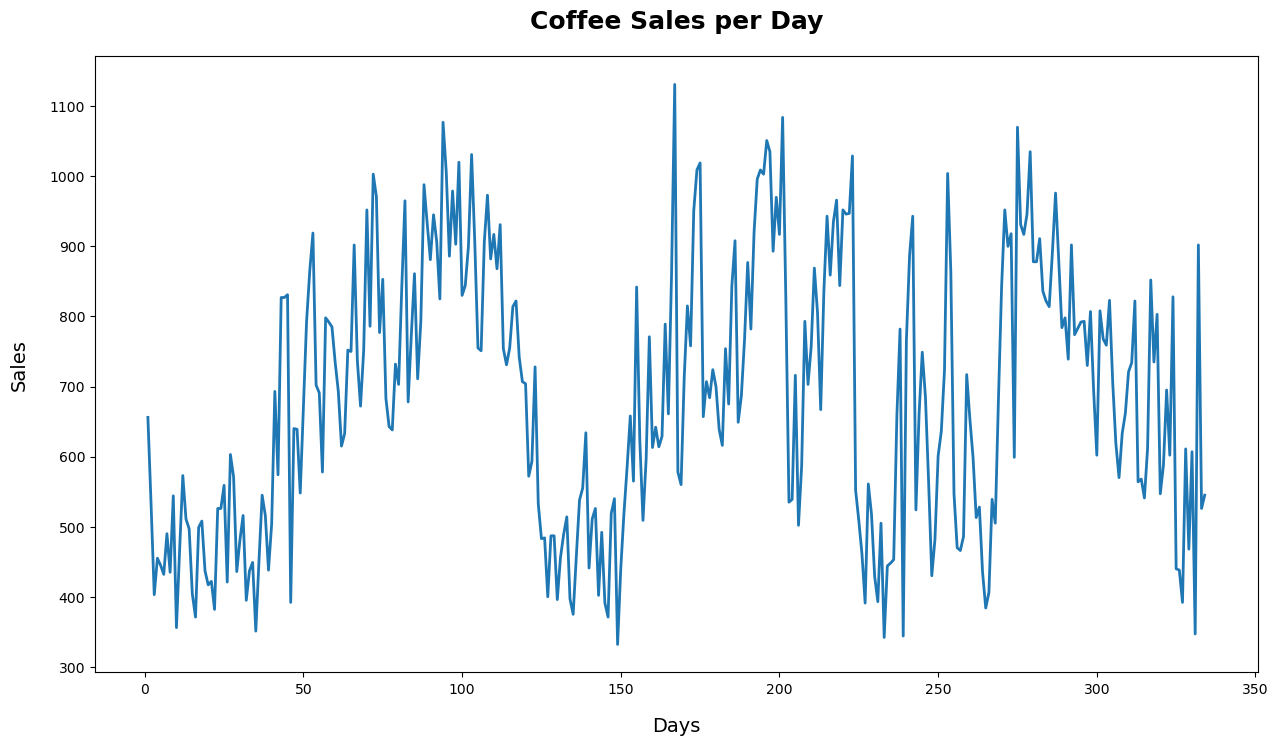

In [501]:
# Kategorinin günlere göre satış miktarı
def amount_by_category(df, by, cat):
    dikt = {}

    for (index, elem) in enumerate(df[by]):
        if by == "Tarih":
            elem = elem.day_of_year
        else:
            elem = elem.__str__().lower()

        if df["KategoriAdı"][index].lower() != cat.lower():
            continue

        if dikt.__contains__(elem):
            dikt[elem] += int(df["Miktar"][index])
        else:
            dikt[elem] = int(df["Miktar"][index])

    return dikt

tarihbazli = amount_by_category(df,'Tarih','Kahve Grubu')
y = list(tarihbazli.values())
x = list(tarihbazli.keys())
x.sort()
plt.figure(figsize=(15,8))
plt.plot(x,y, linewidth=2.0)
plt.title("Coffee Sales per Day", fontsize =18, fontweight= "bold", pad=20)
plt.xlabel("Days", fontsize = 14, labelpad = 15)
plt.ylabel("Sales",fontsize = 14, labelpad = 15)
plt.show()

R-squared value: 0.01158914955535062


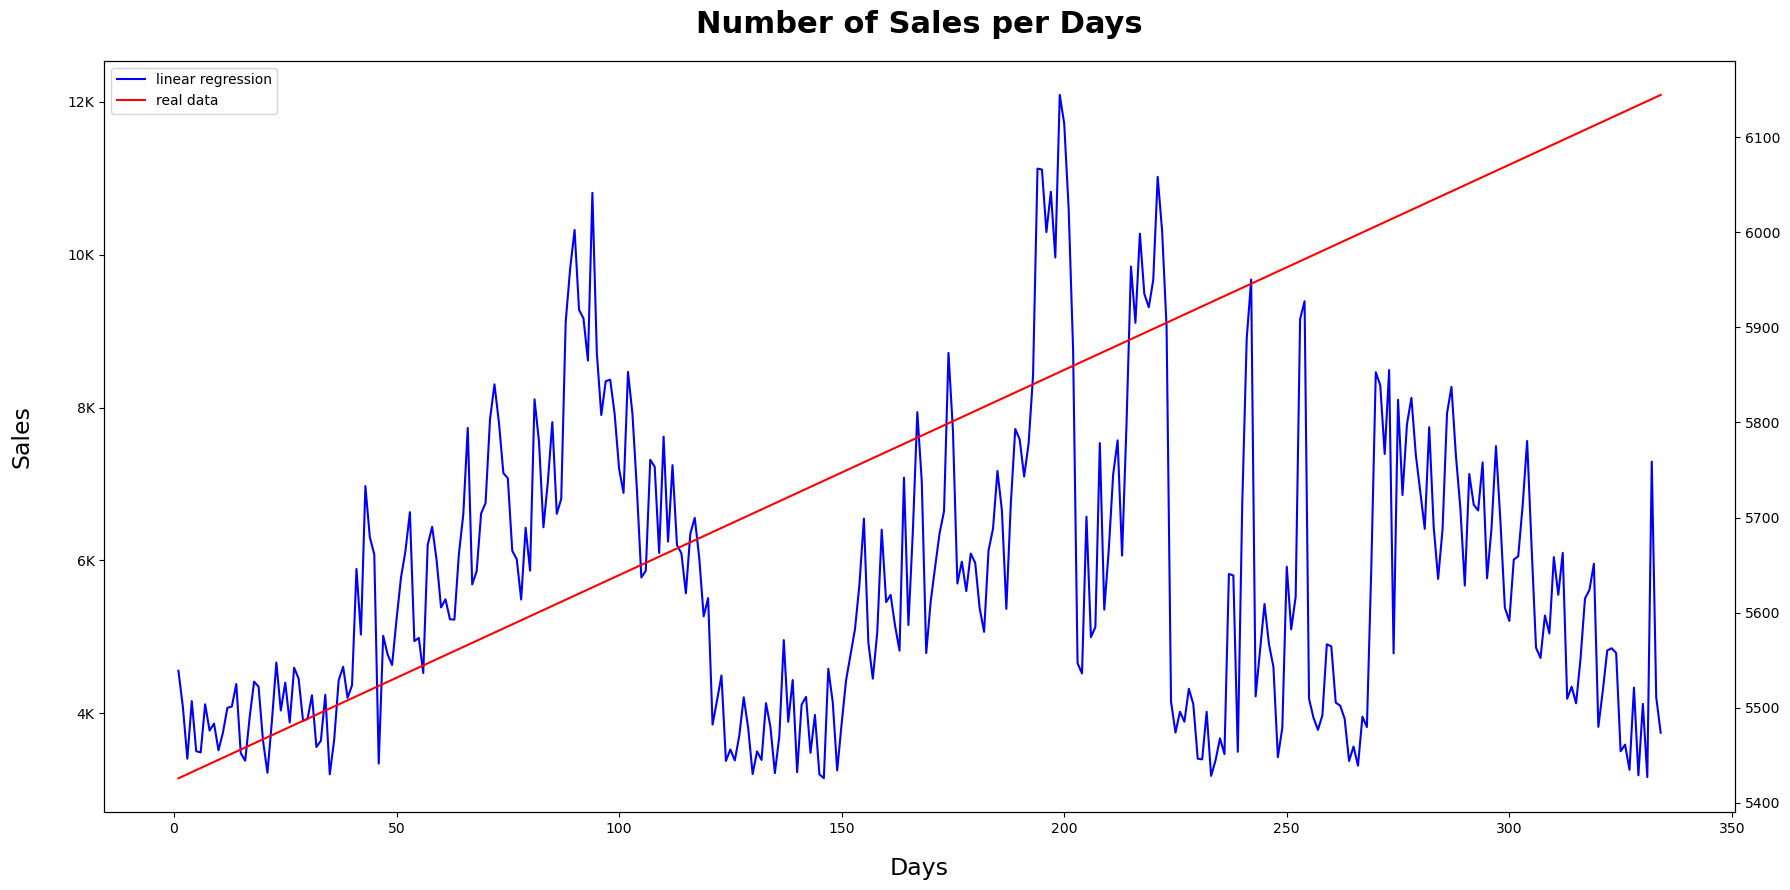

In [557]:
tarihbazli = amount_by(df,"Tarih") #making a linear regression model. as it is not really effective, we decided to make a non-linear regression model
y = list(tarihbazli.values())
model = LinearRegression()
x = np.arange(1,335,1).reshape(-1, 1)
model.fit(x,y)
r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

x2 = np.arange(1,335,1)
fig, ax1 = plt.subplots(figsize=(18,9))
ax1.plot(x2, y, color='blue',label='linear regression')
plt.xlabel("Days", fontsize = 17, labelpad = 15)
plt.ylabel("Sales", fontsize = 17, labelpad = 25)

ax2 = ax1.twinx()  # x ekseni ortak baska bir eksen olusturalim

color = 'blue'
ax2.plot(x2, model.predict(x), color='red',label='real data')
plt.title("Number of Sales per Days", fontsize =22, fontweight= "bold", pad=20)
formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)
fig.tight_layout()  # y etiketleri duzgun ciksin diye

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
plt.savefig("linearregression.pdf")
plt.show()

0.5072885890076779
            12             11             10             9
-3.252e-22 x  + 3.997e-19 x  - 1.029e-16 x  - 8.612e-14 x
              8             7             6             5           4
 + 7.545e-11 x - 2.666e-08 x + 5.307e-06 x - 0.0006331 x + 0.04502 x
          3         2
 - 1.829 x + 39.62 x - 372.8 x + 4816


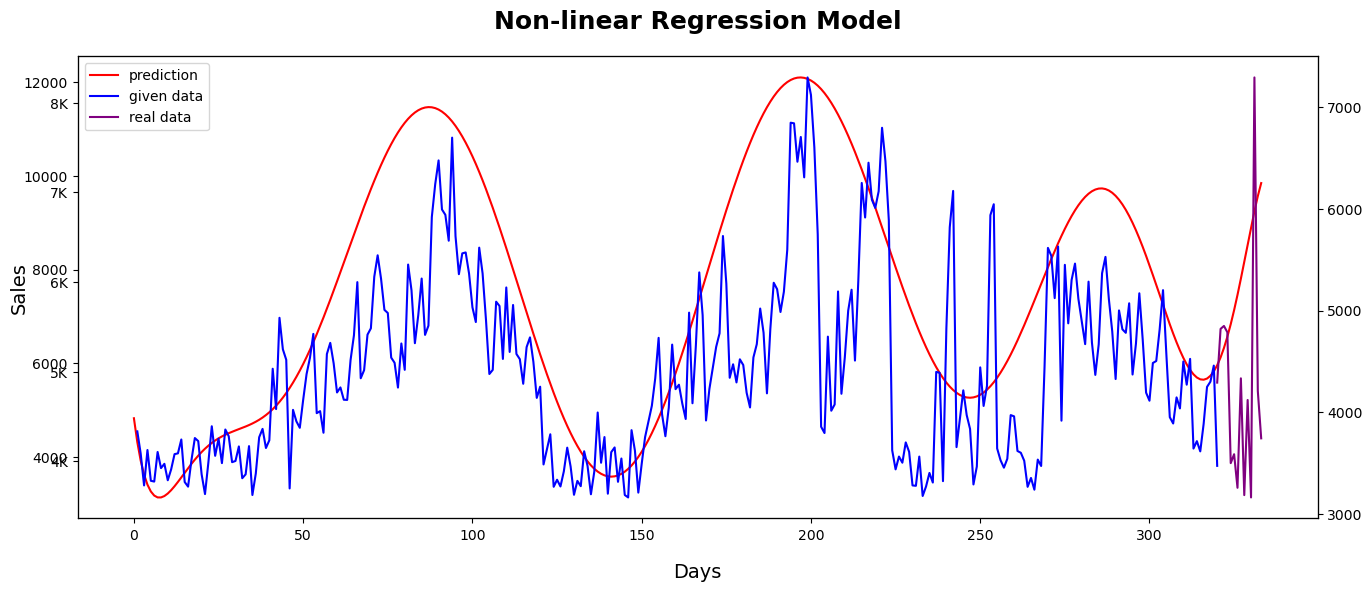

In [560]:
#this is a Polynomial Regression model. 
#we trained it till 320. day. it provides a hopeful estimation for last 15 days.

from sklearn.metrics import r2_score #added to avoid some little problems

y = list(tarihbazli.values())[:320]
x = np.arange(1,321,1)

mymodel = np.poly1d(np.polyfit(x, y, 12))
print(r2_score(y, mymodel(x)))
print(mymodel)

x1 = np.arange(1,335,1)
fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot(mymodel(x1),color='red', label='prediction')
plt.title("Non-linear Regression Model", fontsize =18, fontweight= "bold", pad=20)
plt.xlabel("Days", fontsize = 14, labelpad = 15)
plt.ylabel("Sales",fontsize = 14, labelpad = 15)
formatter = FuncFormatter(millions)
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()  # x ekseni ortak baska bir eksen olusturalim
ax2.plot(x, y, color='blue', label='given data')

x3 = np.arange(320,334,1)
ax3 = ax2.twinx()
ax3.plot(x3,list(tarihbazli.values())[320:334], color='purple',label='real data')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

plt.legend(handles1 + handles2 + handles3, labels1 + labels2 + labels3, loc='upper left')
plt.savefig("polynomialregression.pdf")
plt.show()